In [10]:
# test the fitting: Deviance

In [6]:
import pickle
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from optimization_utils import param_vec_to_dict, make_boundary

In [2]:
folder = "0824_HitFa_50_100/"

In [13]:
file_list = glob.glob(folder + "outfiles/*data*.pkl")
file_list = [i.replace(folder + "outfiles/","") for i in file_list]
file_list = [i.replace(".pkl","") for i in file_list]
file_list = [tuple(map(int,i.split("data"))) for i in file_list]
file_list.sort()
# file_list

In [14]:
pso_df = pd.DataFrame(columns = ['iter','particle','err'])
_, _, what_to_fit = make_boundary()

for iter, p in file_list:
    path = folder + "outfiles/" + str(iter) + "data" + str(p) + ".pkl" 
    with open(path, 'rb') as inp:
        data = pickle.load(inp)
    if len(data) != 0:
        err = data['err']
        params = data['params']
        row_dict = {"iter":iter,"particle":p,"err":err}
        row_dict.update({what_to_fit[i]:params[i] for i in range(len(params))})
        pso_df = pso_df.append(row_dict,ignore_index=True)
    
pso_df

,iter,particle,err,beta_enc,beta_rec,beta_rec_post,c_thresh,gamma_fc,s_fc
0,1.0,0.0,0.289005,0.382295,0.895809,0.515513,0.209545,0.588161,0.028258
1,1.0,1.0,0.561122,0.895714,0.165716,0.265178,0.539407,0.289301,0.354444
2,1.0,2.0,0.557211,0.130172,0.574039,0.296670,0.179582,0.011552,0.234523
3,1.0,3.0,0.561122,0.812476,0.134302,0.477172,0.089425,0.979986,0.302031
4,1.0,4.0,0.514204,0.566262,0.412056,0.905107,0.918484,0.964614,0.445379
...,...,...,...,...,...,...,...,...,...
1843,50.0,87.0,0.250134,0.564429,0.039612,0.359928,0.228346,0.199796,0.056361
1844,50.0,91.0,0.391754,0.548447,0.252379,0.377507,0.688611,0.144337,0.168498
1845,50.0,93.0,0.561122,0.544893,0.323147,0.372264,0.126591,0.249983,0.218771
1846,50.0,97.0,0.468874,0.297391,0.431655,0.397069,0.464333,0.318938,0.023380


In [15]:
pso_df.loc[pso_df.iter == 50]

,iter,particle,err,beta_enc,beta_rec,beta_rec_post,c_thresh,gamma_fc,s_fc
1821,50.0,1.0,0.028926,0.305663,0.730116,0.416914,0.703052,0.172400,0.224876
1822,50.0,6.0,0.120586,0.125114,0.432992,0.286648,0.659823,0.053115,0.223870
1823,50.0,9.0,0.450685,0.226351,0.026989,0.389967,0.742388,0.099683,0.245023
1824,50.0,10.0,0.488160,0.656481,0.583777,0.338179,0.940837,0.387370,0.334593
1825,50.0,15.0,0.286033,0.276614,0.667506,0.466679,0.634977,0.268563,0.218597
1826,50.0,17.0,0.314281,0.677742,0.248203,0.421687,0.705241,0.159266,0.230747
1827,50.0,25.0,0.177970,0.860536,0.835137,0.632930,0.680867,0.217098,0.221843
1828,50.0,30.0,0.235405,0.416480,0.675428,0.346633,0.673820,0.226204,0.189798
1829,50.0,38.0,0.556591,0.228244,0.448977,0.403767,0.421883,0.246332,0.326477
1830,50.0,43.0,0.441294,0.496877,0.257546,0.303674,0.807241,0.167043,0.221061


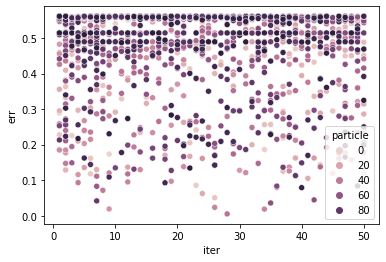

In [16]:
sns.scatterplot(data=pso_df, x="iter", y="err", hue="particle")
plt.show()

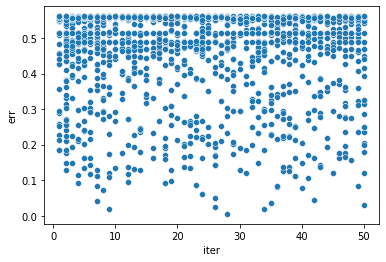

In [17]:
sns.scatterplot(data=pso_df, x="iter", y="err")
plt.show()

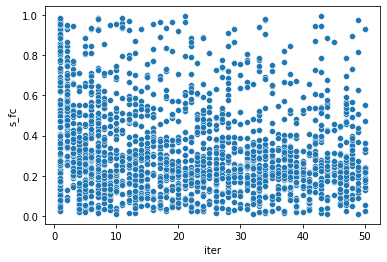

In [18]:
sns.scatterplot(data=pso_df, x="iter", y="s_fc")
plt.show()

In [19]:
param_vec = np.loadtxt('/home1/beigejin/MyCMR2/Modeling/CMR2/fitting/' + folder + 'outfiles/xoptb.txt')
prams = param_vec_to_dict(param_vec)
prams

{'beta_enc': 0.235691,
 'beta_rec': 0.566055,
 'beta_rec_post': 0.355819,
 'beta_distract': None,
 'phi_s': 2,
 'phi_d': 0.5,
 's_cf': 0,
 's_fc': 0.224811,
 'kappa': 0.5,
 'eta': 0.5,
 'omega': 8,
 'alpha': 4,
 'c_thresh': 0.7035,
 'lamb': 0.5,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 50,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'gamma_fc': 0.160357,
 'gamma_cf': 0.5}

### Run CMR2 on the Best Params

In [20]:
import CMR2_jbg as cmr
pd.set_option('display.max_columns', None)
np.set_printoptions(edgeitems=20, linewidth=200,precision=4)

In [21]:
rng = np.random.default_rng(seed=42)

In [22]:
# import recognition dataframe
with open("/home1/beigejin/Recog_David/data_als/data_df_clean.pkl", 'rb') as inp:
    df = pickle.load(inp)
df

,rt,subject_ID,item,lag,category,confidence,category_label,position,old,yes,curr_cat_length,curr_cat_label_length,itemno,session
57307,1514.875,0,CHICKEN,0,Uncategorized,1.0,FarmAnimals,0,False,0,NaN,0,53,0
57766,853.505,0,BLUEBERRY,0,Uncategorized,1.0,Fruit,1,False,0,NaN,0,26,0
58224,731.040,0,BUS,0,Uncategorized,1.0,Vehicles,2,False,0,NaN,0,33,0
58695,848.955,0,LEMON,0,Uncategorized,1.0,Fruit,3,False,0,NaN,1,151,0
59159,643.880,0,OYSTER,0,Uncategorized,1.0,OceanAnimals,4,False,0,NaN,0,187,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337333,1911.000,656,COLA,37,Beverages,2.0,Beverages,575,True,0,18.0,18,60,547
337508,2358.000,656,BASEBALL,115,Toys,8.0,Toys,576,True,1,23.0,23,10,547
337682,1239.000,656,TEA,24,Beverages,8.0,Beverages,577,True,1,19.0,19,265,547
337870,1567.000,656,RADIO,41,Uncategorized-Singleton,2.0,Electronics,578,True,0,NaN,23,213,547


In [23]:
s_mat = np.load('/home1/beigejin/Recog_David/data_als/semantic_mat_fasttext.npy')

In [24]:
df_simu = cmr.run_continuous_recog_multi_sess(prams,df,s_mat)
df_simu

CMR Time: 234.171701669693


,session,position,itemno,s_resp,s_rt,csim
57307,0,0,53,0.0,0.0,0.000000
57766,0,1,26,0.0,0.0,0.170903
58224,0,2,33,0.0,0.0,0.288319
58695,0,3,151,0.0,0.0,0.427254
59159,0,4,187,0.0,0.0,0.503716
...,...,...,...,...,...,...
337333,547,575,60,1.0,0.0,0.718725
337508,547,576,10,0.0,0.0,0.703182
337682,547,577,265,1.0,0.0,0.727331
337870,547,578,213,0.0,0.0,0.687675


In [25]:
df_new = df_simu.merge(df,on=['session','position','itemno'])
df_new

,session,position,itemno,s_resp,s_rt,csim,rt,subject_ID,item,lag,category,confidence,category_label,old,yes,curr_cat_length,curr_cat_label_length
0,0,0,53,0.0,0.0,0.000000,1514.875,0,CHICKEN,0,Uncategorized,1.0,FarmAnimals,False,0,NaN,0
1,0,1,26,0.0,0.0,0.170903,853.505,0,BLUEBERRY,0,Uncategorized,1.0,Fruit,False,0,NaN,0
2,0,2,33,0.0,0.0,0.288319,731.040,0,BUS,0,Uncategorized,1.0,Vehicles,False,0,NaN,0
3,0,3,151,0.0,0.0,0.427254,848.955,0,LEMON,0,Uncategorized,1.0,Fruit,False,0,NaN,1
4,0,4,187,0.0,0.0,0.503716,643.880,0,OYSTER,0,Uncategorized,1.0,OceanAnimals,False,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317835,547,575,60,1.0,0.0,0.718725,1911.000,656,COLA,37,Beverages,2.0,Beverages,True,0,18.0,18
317836,547,576,10,0.0,0.0,0.703182,2358.000,656,BASEBALL,115,Toys,8.0,Toys,True,1,23.0,23
317837,547,577,265,1.0,0.0,0.727331,1239.000,656,TEA,24,Beverages,8.0,Beverages,True,1,19.0,19
317838,547,578,213,0.0,0.0,0.687675,1567.000,656,RADIO,41,Uncategorized-Singleton,2.0,Electronics,True,0,NaN,23


In [3]:
f = folder.rstrip("/")

In [27]:
with open('/home1/beigejin/Recog_David/data_als/data_df_simu_' + f + '.pkl', 'wb') as outp:
    pickle.dump(df_new, outp, pickle.HIGHEST_PROTOCOL)

In [7]:
with open("/home1/beigejin/Recog_David/data_als/data_df_simu_" + f + ".pkl", 'rb') as inp:
    df_new = pickle.load(inp)

NameError: name 'prams' is not defined

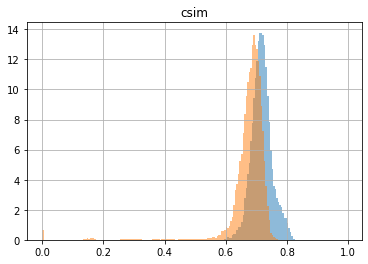

In [8]:
bin_arr = np.arange(0,1,0.005)
df_tar = df_new.loc[df_new.old == True]
df_lure = df_new.loc[df_new.old == False]

fig, ax = plt.subplots()
df_tar.hist(column = 'csim', bins=bin_arr, ax = ax, density = True,alpha=0.5)
df_lure.hist(column = 'csim', bins=bin_arr, ax = ax, density = True, alpha=0.5)
plt.axvline(prams["c_thresh"], color = 'k')
plt.show()